In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

In [9]:
static_PnL_path = '../_mathematica/data_PL/'
static_PnL_files = [static_PnL_path + f for f in os.listdir(static_PnL_path) if f.endswith('r_outsample.csv')]
len(static_PnL_files)

495

In [10]:
print(static_PnL_files[0], static_PnL_files[1])

../_mathematica/data_PL/41_Gaussian_PLr_outsample.csv ../_mathematica/data_PL/22_Clayton_PLr_outsample.csv


In [11]:
static_PnL_files

['../_mathematica/data_PL/41_Gaussian_PLr_outsample.csv',
 '../_mathematica/data_PL/22_Clayton_PLr_outsample.csv',
 '../_mathematica/data_PL/16_Plackett_PLr_outsample.csv',
 '../_mathematica/data_PL/1_t_Copula_PLr_outsample.csv',
 '../_mathematica/data_PL/5_Gumbel_PLr_outsample.csv',
 '../_mathematica/data_PL/25_Gumbel_PLr_outsample.csv',
 '../_mathematica/data_PL/12_Gumbel_PLr_outsample.csv',
 '../_mathematica/data_PL/34_t_Copula_PLr_outsample.csv',
 '../_mathematica/data_PL/23_Plackett_PLr_outsample.csv',
 '../_mathematica/data_PL/38_t_Copula_PLr_outsample.csv',
 '../_mathematica/data_PL/2_NIG Factor_PLr_outsample.csv',
 '../_mathematica/data_PL/0_Plackett_PLr_outsample.csv',
 '../_mathematica/data_PL/1_Gumbel_PLr_outsample.csv',
 '../_mathematica/data_PL/42_Frank_PLr_outsample.csv',
 '../_mathematica/data_PL/17_t_Copula_PLr_outsample.csv',
 '../_mathematica/data_PL/48_NIG Factor_PLr_outsample.csv',
 '../_mathematica/data_PL/46_NIG Factor_PLr_outsample.csv',
 '../_mathematica/data_PL

In [12]:
Copula_names = ['Gaussian', 't_Copula_P', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep', 'NIG Factor']
ref_df = pd.read_csv(static_PnL_files[i])
risk_measures = list(ref_df.columns)
risk_measures = risk_measures[3:]

In [13]:
results = dict()
results['unhedged', 'unhedged'] = ref_df.unhedged
results['future', 'future'] = ref_df.future

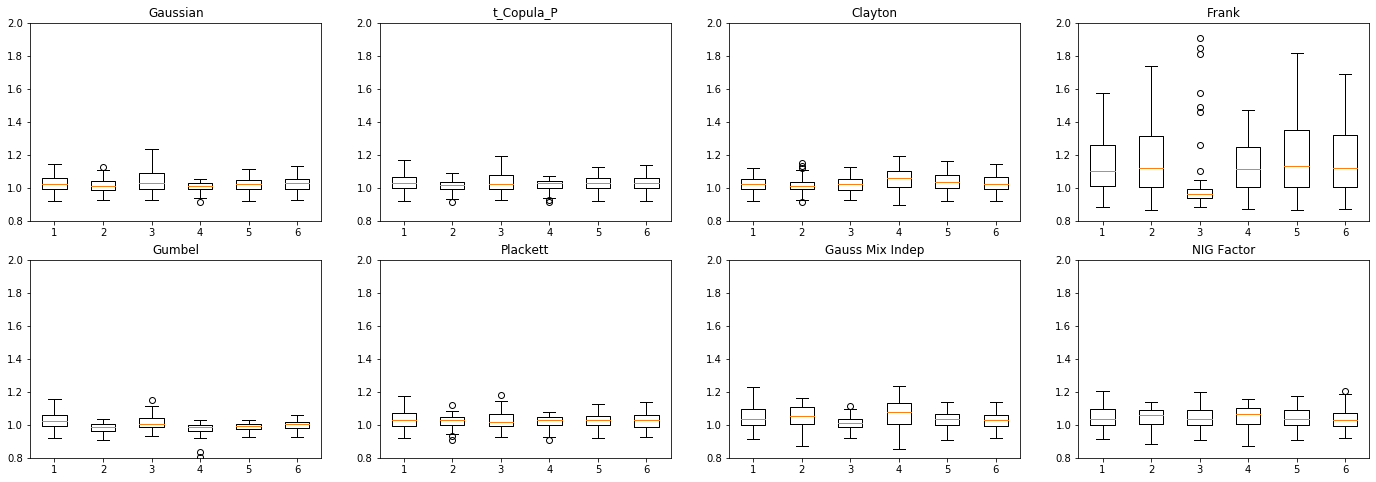

In [14]:
fig, ax = plt.subplots(2,4,figsize=(24,8))

for n,C in enumerate(Copula_names):
    PnL_arr = []
    Date_arr = []
    for i in range(len(static_PnL_files)):

        if static_PnL_files[i].find(C) <0:
            continue

        PnL = pd.read_csv(static_PnL_files[i])
        Date = PnL.iloc[0,0]

        PnL = np.exp(PnL.iloc[:,1:].sum(axis=0))
        PnL_arr.append(PnL)
        Date_arr.append(Date)
        
    df = pd.DataFrame(PnL_arr, index=Date_arr)
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    
    for rm in risk_measures:
        results[C, rm] = df.loc[:,rm]
    
    row = 0
    column = n
    
    if n > 3:
        row = 1
        column = n-4
    
    ax[row, column].boxplot([df.iloc[:,i] for i in range(2,len(df.columns))])
    ax[row, column].set_title(C)
    ax[row, column].set_ylim((0.8,2.0))

In [15]:
np.array(df.unhedged)

array([0.77469789, 0.87183463, 0.88372527, 0.91519056, 0.94571174,
       1.00438827, 1.1758855 , 1.06170717, 1.0943365 , 0.69341728,
       0.72067344, 0.7220773 , 0.75718937, 0.80619161, 0.93743388,
       1.05663588, 1.213873  , 1.24218539, 1.31891622, 1.23152968,
       1.19026326, 1.1102568 , 1.13032812, 1.0103646 , 0.9403249 ,
       0.9259217 , 0.95587298, 1.07979896, 1.23986474, 2.13450068,
       1.86107502, 1.75250025, 1.70387697, 1.66465264, 1.50236937,
       1.4179103 , 1.19199951, 1.23808326, 1.12368826, 1.29981308,
       1.37772043, 1.37634791, 1.60288383, 1.67267085, 1.95233362,
       1.80412943, 2.0465056 , 1.93953398, 2.02445871, 2.27349136,
       2.93876366, 2.9732999 , 3.04684181, 2.7291425 , 3.60305106])

In [16]:
results['unhedged', 'unhedged'] = np.array(df.unhedged)

results['future', 'future'] = np.array(df.future)

In [17]:
for r in results.values():
    print(len(r))

55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55


In [106]:
import pickle
with open('static_results.pickle', 'wb') as handle:
    pickle.dump(results, handle)

In [19]:
pd.DataFrame(results)

unhedged    future  Gaussian                                \
            unhedged    future  Variance   VaR 99%   VaR 95%    ES 99%   
2020-01-08  0.774698  0.803223  0.921211  0.923589  0.926657  0.913955   
2020-01-15  0.871835  0.880292  0.954195  0.954963  0.955160  0.952129   
2020-01-23  0.883725  0.886625  0.961148  0.961809  0.962128  0.960053   
2020-01-30  0.915191  0.938337  0.945742  0.945326  0.944819  0.946800   
2020-02-06  0.945712  0.976620  0.943577  0.943122  0.941064  0.946465   
2020-02-13  1.004388  1.030452  0.956378  0.954238  0.952311  0.960731   
2020-02-21  1.175885  1.235007  0.963277  0.965563  0.949321  0.976573   
2020-02-28  1.061707  1.049457  1.007530  1.007611  1.001218  1.011623   
2020-03-06  1.094337  1.082693  1.009352  1.008597  1.002973  1.016846   
2020-03-13  0.693417  0.662523  0.984918  0.982875  0.993833  0.973189   
2020-03-20  0.720673  0.706887  0.966576  0.962517  0.971782  0.961419   
2020-03-27  0.722077  0.712922  0.963076  0.958083  0.969172  0.955378   
2020-04-03  0.757189  0.770483  0.938925  0.937048  0.940722  0.936182   
2020-04-13  0.806192  0.798713  0.970591  0.969598  0.971862  0.967548   
2020-04-20  0.937434  0.927940  0.988294  0.989283  0.987629  0.989806   
2020-04-27  1.056636  1.062713  0.992614  0.997558  0.987009  0.997919   
2020-05-04  1.213873  1.224727  1.009441  1.018832  1.002207  1.020121   
2020-05-11  1.242185  1.289359  0.990261  0.996454  0.979899  0.998250   
2020-05-18  1.318916  1.326586  1.032379  1.043313  1.019061  1.046157   
2020-05-26  1.231530  1.215511  1.037871  1.041207  1.030374  1.041997   
2020-06-02  1.190263  1.164742  1.039089  1.044869  1.034441  1.046917   
2020-06-09  1.110257  1.084024  1.029138  1.030754  1.029916  1.033514   
2020-06-16  1.130328  1.123159  1.018344  1.023685  1.017059  1.023970   
2020-06-23  1.010365  0.984208  1.021581  1.023419  1.021410  1.023358   
2020-06-30  0.940325  0.926185  1.000849  1.001965  1.001219  1.002274   
2020-07-08  0.925922  0.915157  0.996010  0.996673  0.996534  0.996941   
2020-07-15  0.955873  0.940314  1.007308  1.008852  1.008471  1.008833   
2020-07-22  1.079799  1.095402  0.999256  1.003075  1.003427  1.005739   
2020-07-29  1.239865  1.258047  1.020167  1.030504  1.028070  1.029134   
2020-08-05  2.134501  2.238274  1.034699  0.965333  1.061769  0.993610   
2020-08-12  1.861075  1.895330  1.065990  1.093792  1.092222  1.026411   
2020-08-19  1.752500  1.781739  1.032478  1.001978  1.063379  1.012035   
2020-08-26  1.703877  1.694101  1.073061  1.093451  1.116269  1.043067   
2020-09-02  1.664653  1.679121  1.057109  1.078029  1.100956  1.029745   
2020-09-10  1.502369  1.511355  1.057481  1.066599  1.091276  1.028049   
2020-09-17  1.417910  1.404747  1.053357  1.067664  1.071943  1.035520   
2020-09-24  1.192000  1.190184  1.024176  1.011626  1.040567  1.013879   
2020-10-01  1.238083  1.222159  1.033659  1.039325  1.051702  1.023267   
2020-10-08  1.123688  1.130214  1.006653  1.007079  1.016551  0.997803   
2020-10-15  1.299813  1.329193  1.006941  0.987100  1.027263  0.990352   
2020-10-22  1.377720  1.399269  1.028670  1.025002  1.047087  1.009645   
2020-10-29  1.376348  1.416114  1.005714  0.986609  1.029681  0.991503   
2020-11-05  1.602884  1.615950  1.051639  1.014348  1.064577  1.025770   
2020-11-12  1.672671  1.694099  1.041507  1.008853  1.069788  1.019957   
2020-11-19  1.952334  1.964459  1.056871  1.011329  1.090337  1.025194   
2020-11-27  1.804129  1.763021  1.086112  1.037644  1.107700  1.053281   
2020-12-04  2.046506  2.054868  1.067617  1.011019  1.090954  1.030757   
2020-12-11  1.939534  1.890871  1.099829  1.032653  1.114790  1.044987   
2020-12-18  2.024459  1.982654  1.087731  1.064154  1.135585  1.035737   
2020-12-28  2.273491  2.326488  1.092715  1.040267  1.138329  1.012294   
2021-01-05  2.938764  3.005523  1.117896  1.043908  1.184860  1.020371   
2021-01-12  2.973300  2.990291  1.143233  1.109418  1.233121  1.045941   
2021-01-20  3.04